In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime

plt.rcParams.update({'figure.max_open_warning': 0})

In [2]:
fig_size = (10, 3)
input_file = '/Users/siddharthsingh/Repositories/covid-19-data/public/data/owid-covid-data.csv'
images_path = '/Users/siddharthsingh/Notebooks/images/'
n = 11
group_one = ['USA', 'IND']

In [3]:
inp = pd.read_csv(input_file)
inp['daily_tests'] = inp['new_tests'].rolling(7).mean()
inp['daily_cases'] = inp['new_cases'].rolling(7).mean()
inp['daily_deaths'] = inp['new_deaths'].rolling(7).mean()
inp['daily_deaths_change_1w'] = inp['daily_deaths'].pct_change(periods=6)*100
inp['daily_deaths_change_1m'] = inp['daily_deaths'].pct_change(periods=30)*100
inp['daily_cases_change_1w'] = inp['daily_cases'].pct_change(periods=6)*100
inp['daily_cases_change_1m'] = inp['daily_cases'].pct_change(periods=30)*100

inp['cfr'] = (100*inp['total_deaths'].rolling(7).sum()/inp['total_cases'].rolling(7).sum()).round(2)
inp['cfr_current'] = (100*inp['daily_deaths'].rolling(7).sum()/inp['daily_cases'].rolling(7).sum()).round(2)
inp['ptr'] = (100*inp['total_cases'].rolling(7).sum()/inp['total_tests'].rolling(7).sum()).round(2)
inp['ptr_current'] = (100*inp['daily_cases'].rolling(7).sum()/inp['daily_tests'].rolling(7).sum()).round(2)
inp['date'] = pd.to_datetime(inp['date'])
print(inp.columns)
inp[inp['iso_code'].isin(['OWID_WRL', 'USA', 'IND'])].groupby('iso_code').tail(1)[[
    'iso_code', 'date', 'total_cases', 'total_deaths', 'daily_cases', 'daily_deaths',
    'daily_deaths_change_1w', 'daily_deaths_change_1m', 'daily_cases_change_1w', 'daily_cases_change_1m',
    'cfr', 'cfr_current']]

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
     

,iso_code,date,total_cases,total_deaths,daily_cases,daily_deaths,daily_deaths_change_1w,daily_deaths_change_1m,daily_cases_change_1w,daily_cases_change_1m,cfr,cfr_current
24867,IND,2020-11-18,8912907.0,130993.0,39556.571429,488.857143,-10.089333,-37.326007,-13.424007,-35.565872,1.47,1.19
53873,USA,2020-11-18,11359802.0,248687.0,157425.142857,1286.285714,11.559906,83.642668,20.481148,181.079757,2.25,0.82
57281,OWID_WRL,2020-11-18,55743951.0,1339436.0,588841.285714,9140.285714,8.201989,72.621071,2.233548,62.523584,2.43,1.51


In [4]:
top_n = inp.groupby('iso_code').tail(1).sort_values('total_cases', ascending=False).head(n)['iso_code'].tolist()
top_fifty = inp.groupby('iso_code').tail(1).sort_values('total_cases', ascending=False).head(50)['iso_code'].tolist()

In [5]:
df = inp[inp['iso_code'].isin(top_n)].groupby('iso_code').tail(1)[[
    'iso_code', 'population', 'total_cases', 'total_deaths', 'cfr', 'daily_cases_change_1w', 'daily_deaths_change_1w']]

df['cases_%_world'] = (df['total_cases']*100)/int(df[df['iso_code'] == 'OWID_WRL']['total_cases'])
df['deaths_%_world'] = (df['total_deaths']*100)/int(df[df['iso_code'] == 'OWID_WRL']['total_deaths'])
df['cases_1M_pop'] = ((df['total_cases']*1000000)/(df['population'])).astype(int)
df['deaths_1M_pop'] = ((df['total_deaths']*1000000)/(df['population'])).astype(int)

df.sort_values('cases_%_world', ascending=False).set_index('iso_code')

,population,total_cases,total_deaths,cfr,daily_cases_change_1w,daily_deaths_change_1w,cases_%_world,deaths_%_world,cases_1M_pop,deaths_1M_pop
iso_code,,,,,,,,,,
OWID_WRL,7.794799e+09,55743951.0,1339436.0,2.43,2.233548,8.201989,100.000000,100.000000,7151,171
USA,3.310026e+08,11359802.0,248687.0,2.25,20.481148,11.559906,20.378538,18.566546,34319,751
IND,1.380004e+09,8912907.0,130993.0,1.47,-13.424007,-10.089333,15.989012,9.779713,6458,94
BRA,2.125594e+08,5911758.0,166699.0,2.83,33.700032,70.710190,10.605201,12.445462,27812,784
FRA,6.527351e+07,2036755.0,46273.0,2.27,-35.727786,5.309505,3.653769,3.454663,31203,708
RUS,1.459345e+08,1991998.0,34387.0,1.72,21.868772,35.774411,3.573478,2.567275,13649,235
ESP,4.675478e+07,1510023.0,41688.0,2.79,-16.422232,-2.767992,2.708855,3.112355,32296,891
GBR,6.788600e+07,1410732.0,52745.0,3.85,12.235358,13.419748,2.530736,3.937851,20780,776
ARG,4.519578e+07,1329005.0,36106.0,2.71,-1.311048,-4.375932,2.384124,2.695612,29405,798


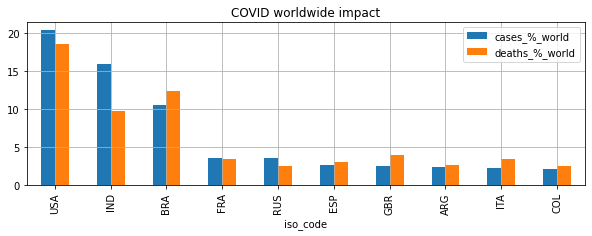

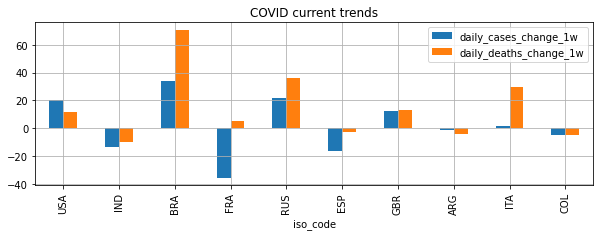

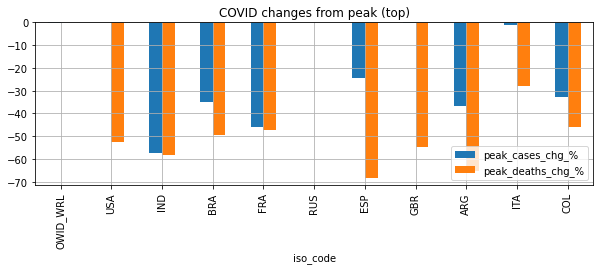

In [6]:
df[df['iso_code'] != 'OWID_WRL'].sort_values('cases_%_world', ascending=False).plot(
    x='iso_code', y=['cases_%_world', 'deaths_%_world'], kind='bar',
    figsize=fig_size, grid=True, title='COVID worldwide impact').get_figure().savefig(images_path+'worldwide.png', bbox_inches='tight')

df[df['iso_code'] != 'OWID_WRL'].sort_values('cases_%_world', ascending=False).plot(
    x='iso_code', y=['daily_cases_change_1w', 'daily_deaths_change_1w'], kind='bar',
    figsize=fig_size, grid=True, title='COVID current trends').get_figure().savefig(images_path+'trends_top.png', bbox_inches='tight')

df_max = inp[inp['iso_code'].isin(top_fifty)].groupby('iso_code')[['daily_cases', 'daily_deaths']].max()
df_last = inp[inp['iso_code'].isin(top_fifty)].groupby('iso_code')[['iso_code', 'daily_cases', 'daily_deaths']].tail(1).set_index('iso_code')
df_pct_chg_max = ((df_last-df_max)*100/df_max)
df_pct_chg_max['total_cases'] = inp[inp['iso_code'].isin(top_fifty)].groupby('iso_code').tail(1).set_index('iso_code')['total_cases']
df_pct_chg_max = df_pct_chg_max.rename(columns={'daily_cases': 'peak_cases_chg_%','daily_deaths': 'peak_deaths_chg_%'})

df_pct_chg_max.sort_values(by='total_cases', ascending=False).head(n).plot(
    y=['peak_cases_chg_%', 'peak_deaths_chg_%'],
    kind='bar', figsize=fig_size, grid=True, title='COVID changes from peak (top)').get_figure().savefig(images_path+'chg_from_peak_top.png', bbox_inches='tight')

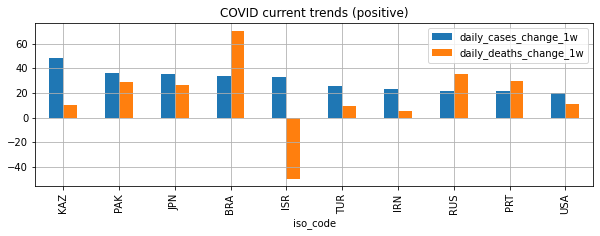

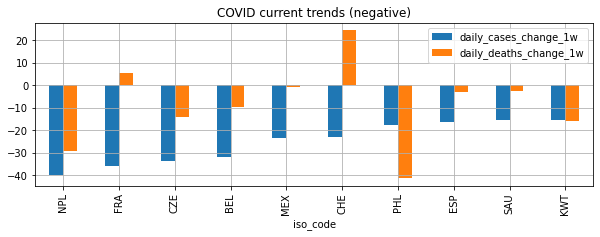

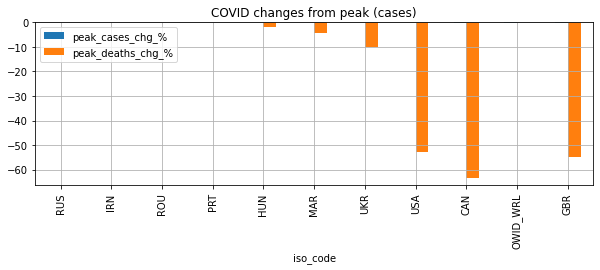

In [7]:
inp[inp['iso_code'].isin(top_fifty)].groupby('iso_code').tail(1)[['iso_code',
                                                                  'daily_deaths_change_1w',
                                                                  'daily_cases_change_1w']].set_index('iso_code').sort_values(
    by='daily_cases_change_1w', ascending=False).head(10).plot(
    y=['daily_cases_change_1w', 'daily_deaths_change_1w'], kind='bar',
    figsize=fig_size, grid=True, title='COVID current trends (positive)').get_figure().savefig(images_path+'trends_positive.png', bbox_inches='tight')

inp[inp['iso_code'].isin(top_fifty)].groupby('iso_code').tail(1)[['iso_code',
                                                                  'daily_deaths_change_1w',
                                                                  'daily_cases_change_1w']].set_index('iso_code').sort_values(
    by='daily_cases_change_1w', ascending=True).head(10).plot(
    y=['daily_cases_change_1w', 'daily_deaths_change_1w'], kind='bar',
    figsize=fig_size, grid=True, title='COVID current trends (negative)').get_figure().savefig(images_path+'trends_negative.png', bbox_inches='tight')

df_pct_chg_max.sort_values(by=['peak_cases_chg_%', 'peak_deaths_chg_%', 'total_cases'], ascending=[False, False, False]).head(n).plot(
    y=['peak_cases_chg_%', 'peak_deaths_chg_%'],
    kind='bar', figsize=fig_size, grid=True, title='COVID changes from peak (cases)').get_figure().savefig(images_path+'chg_from_peak_cases.png', bbox_inches='tight')

In [8]:
def plot_weekly_avg(df, iso_code='USA'):
    df[(df['iso_code'] == iso_code) & (df['date'] >= '2020-03-01')][[
        'date', 'daily_cases', 'daily_deaths', 'daily_tests']].plot(
        x='date', y=['daily_cases', 'daily_deaths'], secondary_y=['daily_deaths'],
        style = ['-', '--'], figsize=fig_size, grid=True, title=country).get_figure().savefig(images_path+'daily_'+country+'.png', bbox_inches='tight')
    
def plot_cfr(df, iso_code='USA'):
    df[(df['iso_code'] == iso_code) & (df['date'] >= '2020-03-01')].plot(
        x='date', y='cfr', style = ['--'], figsize=fig_size, grid=True, title=country)
    
def plot_ptr(df, iso_code='USA'):
    df[(df['iso_code'] == iso_code) & (df['date'] >= '2020-03-01')].plot(
        x='date', y='ptr',
        style = ['--'], figsize=fig_size, grid=True, title=country)
    
def plot_totals(df, iso_code='USA'):
    df[(df['iso_code'] == iso_code) & (df['date'] >= '2020-03-01')][[
        'date', 'total_cases', 'total_deaths']].plot(
        x='date', y=['total_cases', 'total_deaths'], secondary_y=['total_deaths'],
        style = ['-', '--'], figsize=fig_size, grid=True, title=country).get_figure().savefig(images_path+'total_'+country+'.png', bbox_inches='tight')

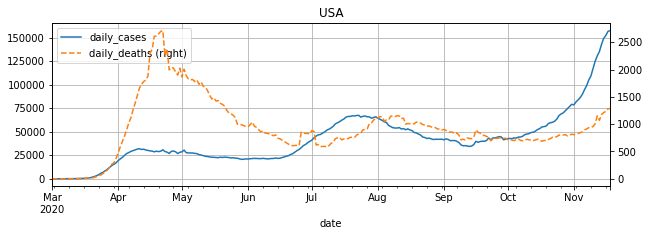

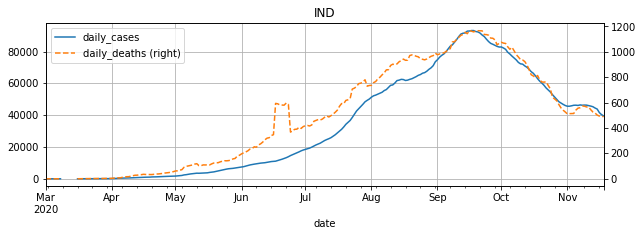

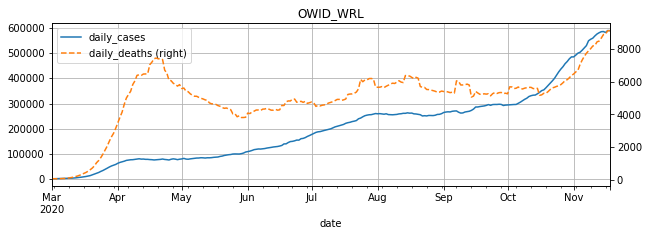

In [9]:
for country in group_one+['OWID_WRL']:
    plot_weekly_avg(inp, iso_code=country)

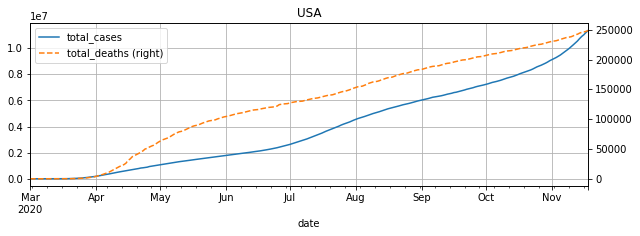

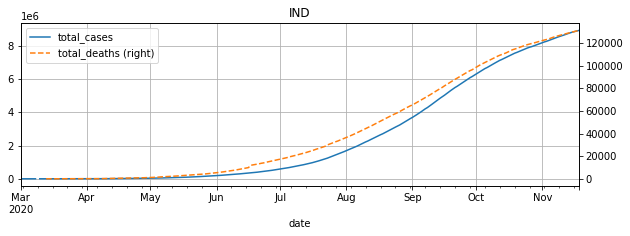

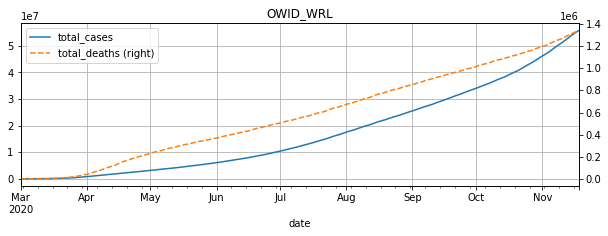

In [10]:
for country in group_one+['OWID_WRL']:
    plot_totals(inp, iso_code=country)

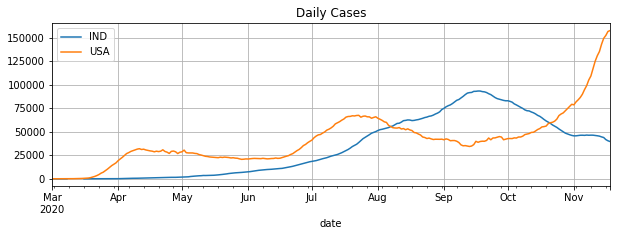

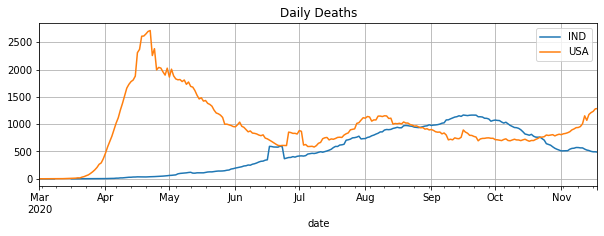

In [11]:
fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one)) & (inp['date'] >= '2020-03-01')].groupby('iso_code').plot(
    x='date', y=['daily_cases'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='Daily Cases')
axes.legend(['IND', 'USA'])

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one)) & (inp['date'] >= '2020-03-01')].groupby('iso_code').plot(
    x='date', y=['daily_deaths'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='Daily Deaths')
axes.legend(['IND', 'USA'])

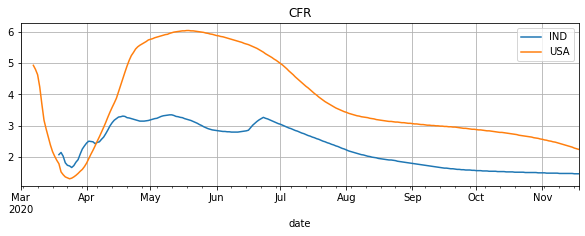

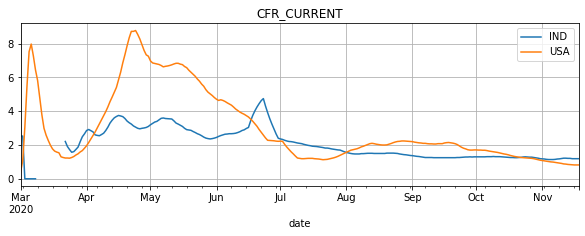

In [12]:
fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(['USA', 'IND'])) & (inp['date'] >= '2020-03-01')].groupby('iso_code').plot(
    x='date', y=['cfr'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='CFR')
axes.legend(['IND', 'USA'])

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(['USA', 'IND'])) & (inp['date'] >= '2020-03-01')].groupby('iso_code').plot(
    x='date', y=['cfr_current'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='CFR_CURRENT')
axes.legend(['IND', 'USA'])

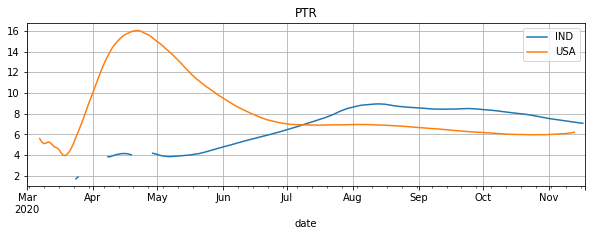

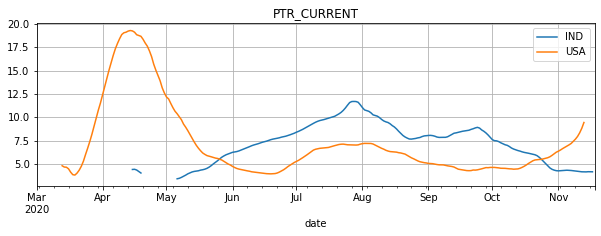

In [13]:
fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(['USA', 'IND'])) & (inp['date'] >= '2020-03-01')].groupby('iso_code').plot(
    x='date', y=['ptr'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='PTR')
axes.legend(['IND', 'USA'])

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(['USA', 'IND'])) & (inp['date'] >= '2020-03-01')].groupby('iso_code').plot(
    x='date', y=['ptr_current'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='PTR_CURRENT')
axes.legend(['IND', 'USA'])